# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

In [2]:
from utilities import visualize_classifier

# Load input data

In [3]:
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into two classes based on labels

In [4]:
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# Visualize input data

C:\Users\aashi\AppData\Local\Temp\ipykernel_3224\2758217787.py:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


Text(0.5, 1.0, 'Input data')

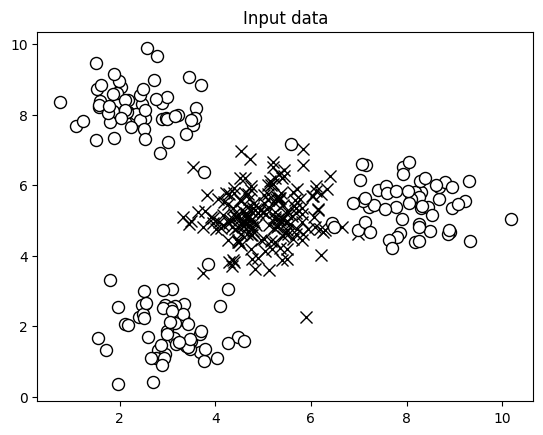

In [5]:
plt.figure()
plt.scatter(
      class_0[:, 0]
    , class_0[:, 1]
    , s=75
    , facecolors='black'
    , edgecolors='black'
    , linewidth=1
    , marker='x'
)
plt.scatter(
      class_1[:, 0]
    , class_1[:, 1]
    , s=75
    , facecolors='white'
    , edgecolors='black'
    , linewidth=1
    , marker='o'
)
plt.title('Input data')

# Split data into training and testing datasets 

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=5
)

# Decision Trees classifier 

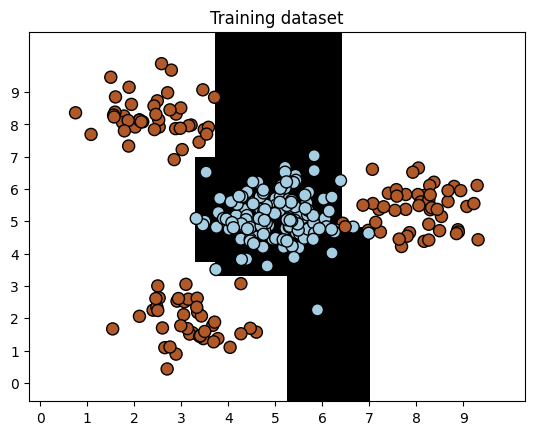

In [8]:
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

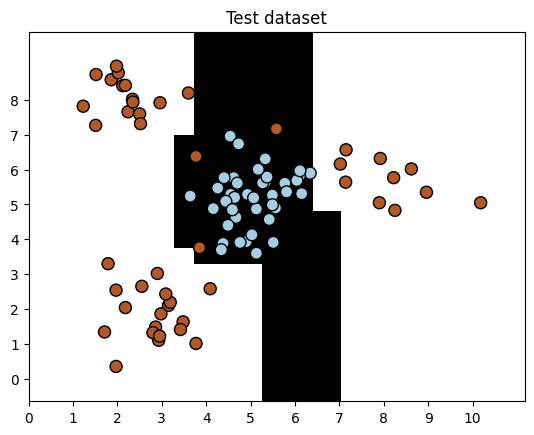

In [9]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

# Evaluate classifier performance

In [12]:
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

########################################



In [13]:
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

########################################

